In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

In [2]:
def quartic(x, eff1, eff2, dist, V0, d0):
    return (x- d0)**4*eff1/dist**2 + (x- d0)**2*eff2/dist**2 + V0

def quad(x, eff, dist, V0, d0):
    return (x- d0)**2*eff/dist**2 +V0

def lin(x, D, D1, D2, d0):
    return D + (x-d0)*D1 + (x-d0)**2*D2

def linear(x, a, b):
    return x*a + b

### RF trapping

In [65]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Test/xyx.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Closed trap sim test.mph'][i]))

data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Test/xyy.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Closed trap sim test.mph'][i]))

data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Test/shiftx.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_xs= []
pot_xs= []
for i in range(8, len(data['% Model'])):
    pos_xs.append(float(data['% Model'][i]))
    pot_xs.append(float(data['Closed trap sim test.mph'][i]))
 
pot_x = np.array(pot_x)
pot_y = np.array(pot_y)
pos_x = np.array(pos_x)
pos_y = np.array(pos_y)
pos_x = (pos_x - pos_x[-1]/2)/1000
pos_y = (pos_y - pos_y[-1]/2)/1000

pot_xs = np.array(pot_xs)
pos_xs = np.array(pos_xs)
pos_xs = (pos_xs - pos_xs[-1]/2)/1000


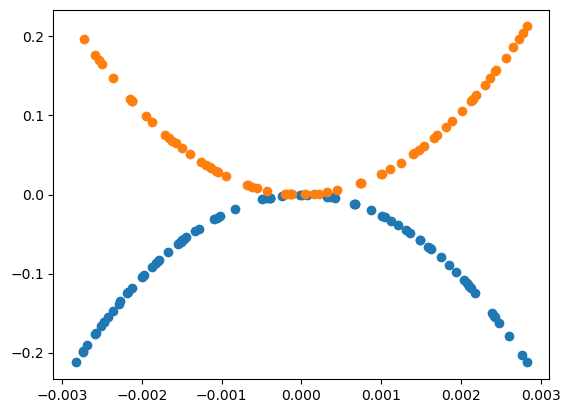

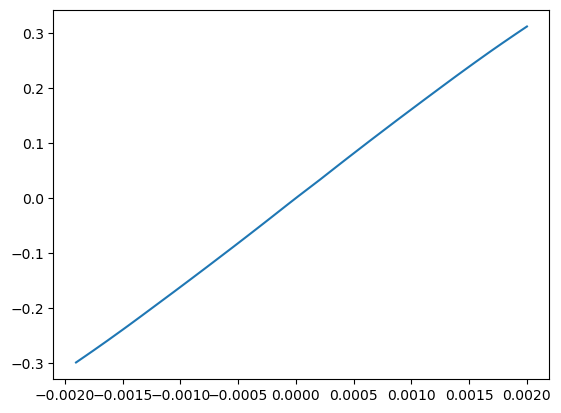

In [66]:
plt.plot(pos_x, pot_x, 'o')
plt.plot(pos_y, pot_y, 'o')
plt.figure()
plt.plot(pos_xs, pot_xs)

[-7.02426096e-01  5.14256999e-04  7.46115431e-07]
[ 7.01642927e-01 -4.13625872e-04 -5.31574986e-07]
[ 1.58730185e+02 -2.03988108e-04]


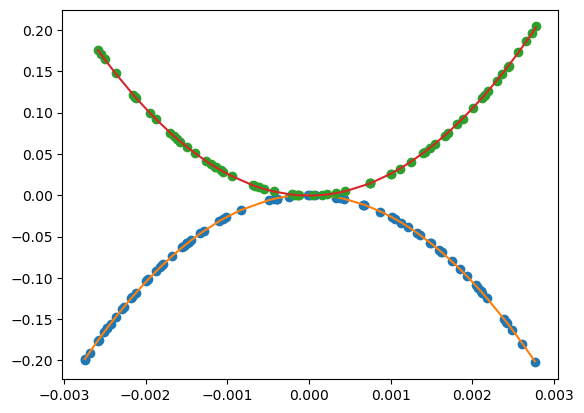

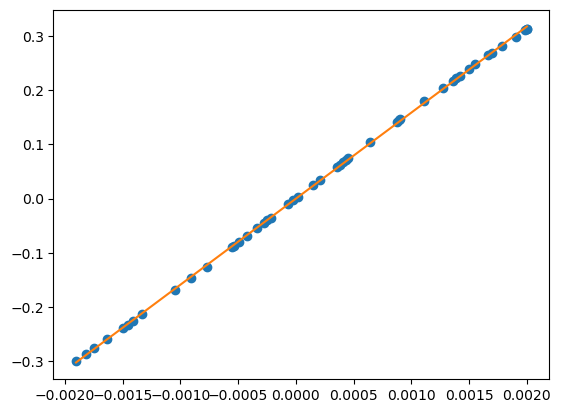

In [68]:
lbx = 1
ubx = -1
lby = 1
uby = -1

d = np.sqrt((4*10**(-3))**2+(4*10**(-3))**2) - 0.5*10**(-3)



fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.36, 0.0045, 0.00001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.00001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitlin, covlin = opt.curve_fit(linear, pos_xs, pot_xs, p0 = [0.06/(6*10**(-3)), 0])
print(fitlin)
fittedlin = linear(pos_xs, fitlin[0], fitlin[1])

plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.figure()
plt.plot(pos_xs, pot_xs, 'o')
plt.plot(pos_xs, fittedlin)


In [77]:
q = 1*1.6*10**(-19)
eta = fitquad2[0]
mass = 216*1.67*10**(-27)#4/3*np.pi*(83*10**(-9))**3*2200
V0 = 20
wrf = 500000*2*np.pi
kb = 1.38*10**(-23)
T = 293

In [78]:
print(4*q*V0*eta/mass/wrf**2/d**2) 
print((2*q*V0*eta/mass/np.sqrt(2)/wrf/d**2)/2/np.pi)
print(np.sqrt(kb*T/((2*q*V0*eta/mass/np.sqrt(2)/wrf/d**2)**2*mass)))
print((0.6*10**(-3))**2/(kb*T/((2*q*V0*eta/mass/np.sqrt(2)/wrf/d**2)**2*mass)))

0.09486072498276998
16769.1654758972
0.0010048400201751444
0.35654032304578936


In [79]:
X = np.linspace(-3.5*10**(-3), 3.5*10**(-3), 400)
Y = np.linspace(-3.5*10**(-3), 3.5*10**(-3), 400)

pseudo = 4*q/2/mass/wrf**2*V0**2*eta**2/d**4*(np.outer((X)**2, np.zeros(len(X))+1)+np.transpose(np.outer(Y**2, np.zeros(len(Y))+1)))
offset = linear(X, *fitlin)

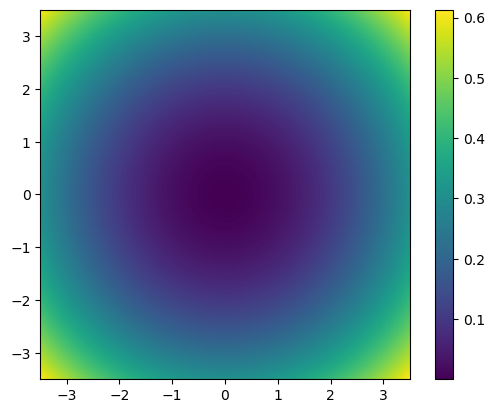

In [80]:
plt.imshow(pseudo, extent = (-3.5, 3.5, -3.5, 3.5))
plt.colorbar()

In [86]:
beta = 4*q*V0*eta/mass/np.sqrt(2)/wrf**2/d**2
print(beta)
print(2*q*(0.6)/(4*10**(-3))/mass/beta**2/wrf**2)

0.06707666190358881
0.002996597317541429


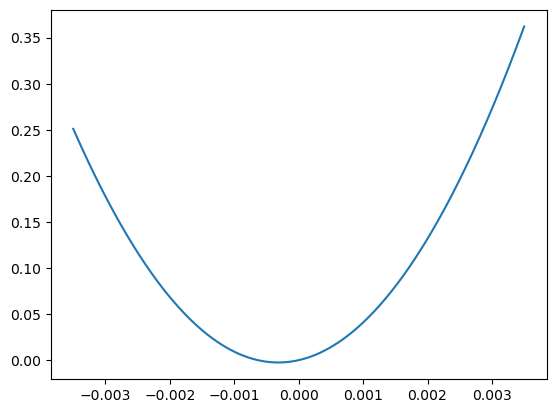

In [89]:
plt.plot(X, pseudo[200]+0.1*offset)

In [ ]:
plt.plot()

### Z trapping

In [66]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Metal holder original/ztrapxp.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Closed trap sim.mph'][i]))

data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Metal holder original/ztrapyp.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Closed trap sim.mph'][i]))
    
data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Metal holder original/ztrapz.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Closed trap sim.mph'][i]))
 
pot_x = np.array(pot_x)
pot_y = np.array(pot_y)
pot_z = np.array(pot_z)
pos_x = np.array(pos_x)
pos_y = np.array(pos_y)
pos_z = np.array(pos_z)
pos_x = (pos_x - pos_x[-1]/2)/1000
pos_y = (pos_y - pos_y[-1]/2)/1000
pos_z = (pos_z - pos_z[-1]/2)/1000 


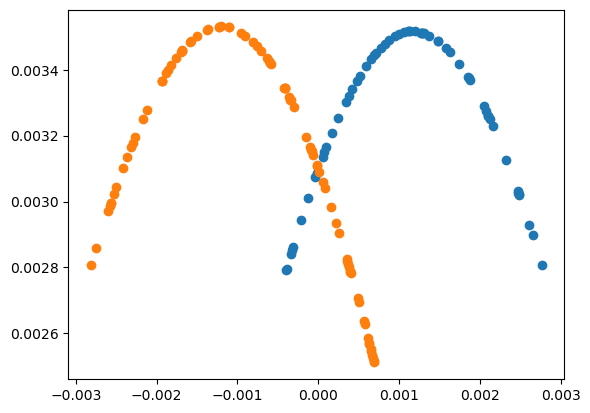

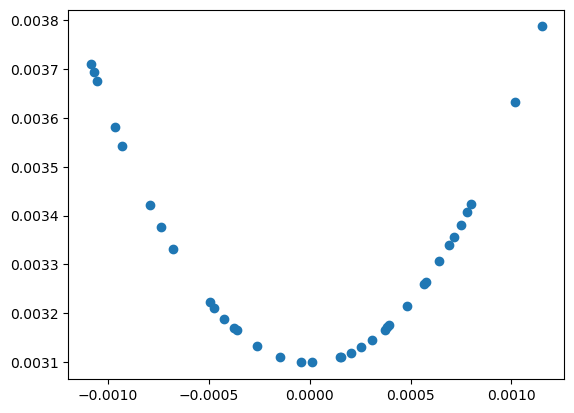

In [134]:
lbx = 140
ubx = -1

lby = 0
uby = -140

lbz = 50
ubz = -50

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.figure()
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

[9.31355689e-02 3.09604059e-03 2.25198177e-06]
[-0.00413267  0.00351231  0.00118559]
[-0.0040278   0.00352119 -0.00120722]


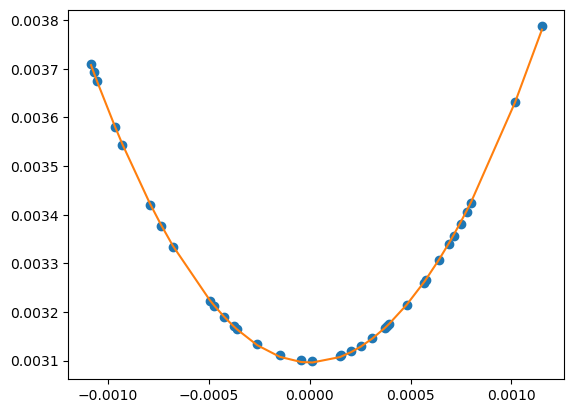

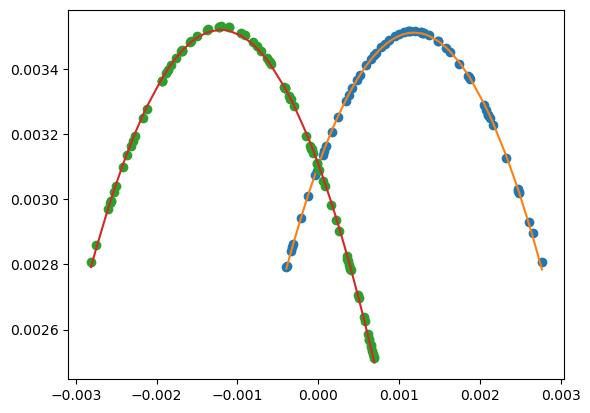

In [135]:
d2 = 13.4*10**(-3)



fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d2, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.36, 0.0045, 0.00001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d2, fitquad3[1], fitquad3[2])

plt.figure()
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

fitquad12, covquad12 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.36, 0.0045, 0.00001])
print(fitquad12)
fittedx = quad(pos_x[lbx:ubx], fitquad12[0], d, fitquad12[1], fitquad12[2])

fitquad22, covquad22 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.00001])
print(fitquad22)
fittedy = quad(pos_y[lby:uby], fitquad22[0], d, fitquad22[1], fitquad22[2])

plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)

In [103]:
q = 10*1.6*10**(-19)
kappa = fitquad3[0]
mass = 4/3*np.pi*(83*10**(-9))**3*2200
U0 = 50
kb = 1.38*10**(-23)
T = 293

In [104]:
print(np.sqrt((2*q*U0*kappa/mass/d2**2))/2/np.pi)
print(np.sqrt(kb*T/(np.sqrt((2*q*U0*kappa/mass/d2**2))**2*mass)))
print((2*10**(-3))**2/(kb*T/(np.sqrt((2*q*U0*kappa/mass/d2**2))**2*mass)))

19.973782979556276
0.000220729497475454
82.09925992282167


In [99]:
q = 1*1.6*10**(-19)
kappa = fitquad3[0]
mass = 216*1.67*10**(-27)
U0 = 50
kb = 1.38*10**(-23)
T = 293

In [100]:
print(np.sqrt((2*q*U0*kappa/mass/d2**2))/2/np.pi)
print(np.sqrt(kb*T/(np.sqrt((2*q*U0*kappa/mass/d2**2))**2*mass)))
print((2*10**(-3))**2/(kb*T/(np.sqrt((2*q*U0*kappa/mass/d2**2))**2*mass)))

25454.003821341164
0.0006619912801691816
9.127575911321214


### How does the psuedo potential look

In [167]:
pos_pseudo = np.linspace(-0.002, 0.002, 1000)
pot_pseudo = (2*q*V0*eta/mass/np.sqrt(2)/wrf/d**2)**2*mass/q/4*(pos_pseudo-fitquad[2])**2#q/4/mass/wrf**2*V0**2/4*eta*d**2*pos_pseudo**2

In [174]:
potz_interp = np.interp(pos_pseudo, pos_x, pot_x*50)

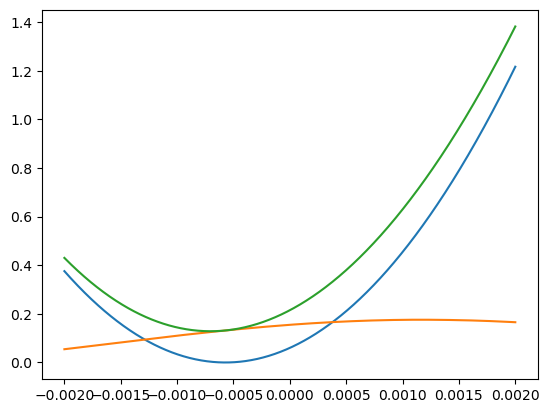

In [179]:
plt.plot(pos_pseudo, pot_pseudo)
plt.plot(pos_pseudo, potz_interp)
plt.plot(pos_pseudo, pot_pseudo+potz_interp)

In [184]:
np.sqrt(kb*T/((1000*2*np.pi)**2*mass))

4.4088030797612335e-06

In [205]:
(q/10*1/4*np.pi/(8.854*10**(-12))*q/(0.1*10**(-6)) - q/10*1/4*np.pi/(8.854*10**(-12))*q/(83*10**(-9)))/kb/T

-11.503088240321048

In [201]:
q

1.6e-18

### Try looking at 2D potential to get pseudo potential

In [442]:
data = pd.read_csv('D:/Simulation Data/COMSOL/Small chamber electric fields/Test/Slice_xytrap.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pos_y = []
pos_z = []
pot_xy = []
for i in range(8, len(data['% Model'])):
    y = float(data['Closed trap sim test.mph'][i])
    z = float(data['blah1'][i])
    if -4.5 < y < 4.5 and -2.1 < z < 2.1:
        pos_y.append(y)
        pos_z.append(z)
        pot_xy.append(float(data['blah2'][i]))

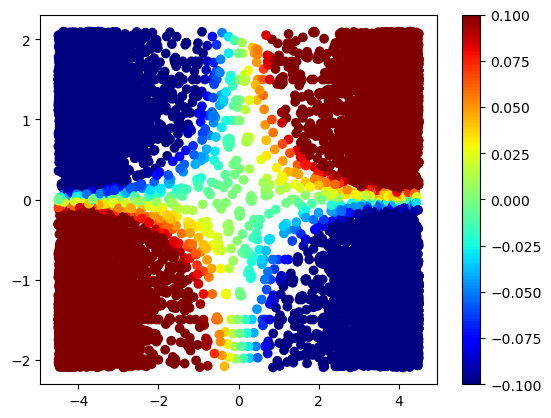

In [443]:
plt.scatter(pos_y, pos_z, c=pot_xy, cmap='jet',vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.show()

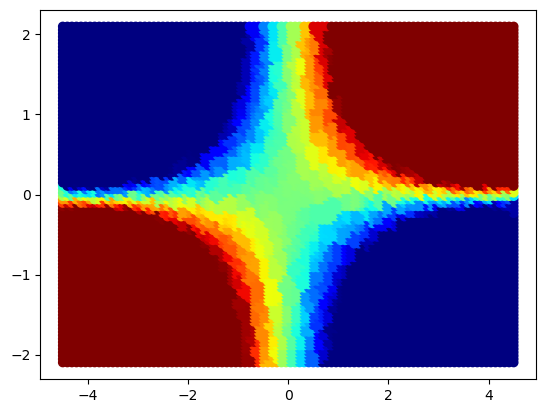

In [445]:
from scipy.interpolate import NearestNDInterpolator

X = np.linspace(min(pos_y), max(pos_y), 100)
Y = np.linspace(min(pos_z), max(pos_z), 100)

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = NearestNDInterpolator(list(zip(pos_y, pos_z)), pot_xy)

Z = interp(X, Y)

plt.scatter(X, Y, c=Z, cmap='jet',vmin=-0.1, vmax=0.1)

In [459]:
np.transpose(Y)[0]

array([-2.0991015 , -2.05668758, -2.01427365, -1.97185973, -1.9294458 ,
       -1.88703188, -1.84461795, -1.80220403, -1.7597901 , -1.71737618,
       -1.67496225, -1.63254833, -1.5901344 , -1.54772048, -1.50530655,
       -1.46289263, -1.4204787 , -1.37806478, -1.33565085, -1.29323693,
       -1.250823  , -1.20840908, -1.16599515, -1.12358123, -1.0811673 ,
       -1.03875338, -0.99633945, -0.95392553, -0.9115116 , -0.86909768,
       -0.82668375, -0.78426983, -0.7418559 , -0.69944198, -0.65702806,
       -0.61461413, -0.57220021, -0.52978628, -0.48737236, -0.44495843,
       -0.40254451, -0.36013058, -0.31771666, -0.27530273, -0.23288881,
       -0.19047488, -0.14806096, -0.10564703, -0.06323311, -0.02081918,
        0.02159474,  0.06400867,  0.10642259,  0.14883652,  0.19125044,
        0.23366437,  0.27607829,  0.31849222,  0.36090614,  0.40332007,
        0.44573399,  0.48814792,  0.53056184,  0.57297577,  0.61538969,
        0.65780362,  0.70021754,  0.74263147,  0.78504539,  0.82

In [463]:
foo = []
dist = []
for i in range(len(Z)):
    foo.append(Z[i,i])
    dist.append(np.sqrt(X[i]**2 + np.transpose(Y)[i]**2)*np.sign(X[i]))

In [469]:
len(dist[0])

100

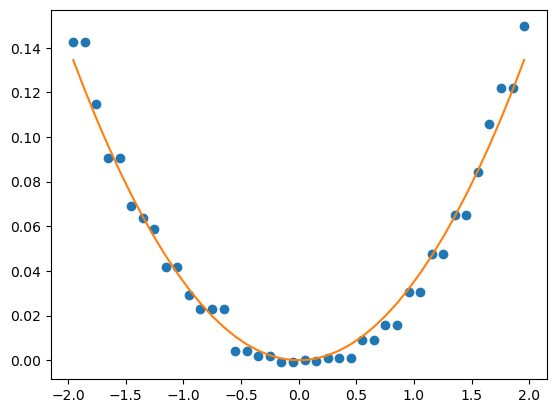

In [478]:
plt.plot(dist[0][30:-30], foo[30:-30], 'o')
plt.plot(dist[0][30:-30], quad(dist[0][30:-30]/1000, 0.5, d, 0, 0))

In [311]:
pseudo = (np.gradient(Z)[0] + np.gradient(Z)[1])**2

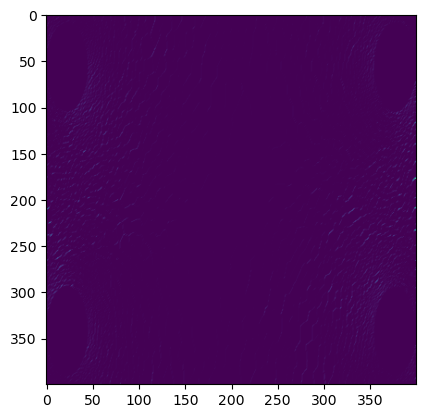

In [312]:
plt.imshow(pseudo)

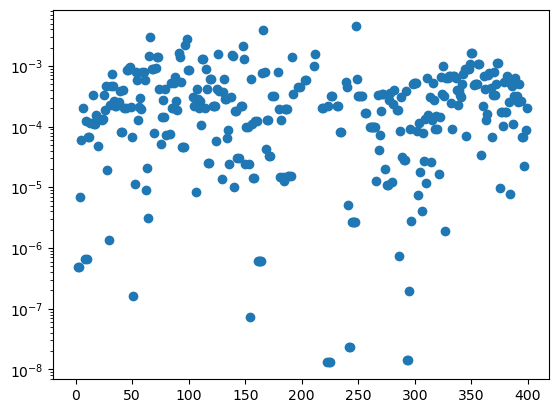

In [314]:
plt.plot(np.transpose(pseudo)[50], 'o')
#plt.plot(pseudo[25], 'o')
plt.yscale('log')

### Off-centre radial

[-4.26682561e-01  6.02981862e-01 -4.55115139e-05]
[2.96978780e-01 5.97564953e-01 4.48076153e-06]


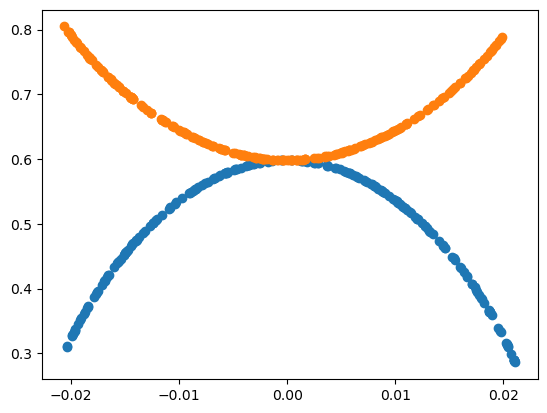

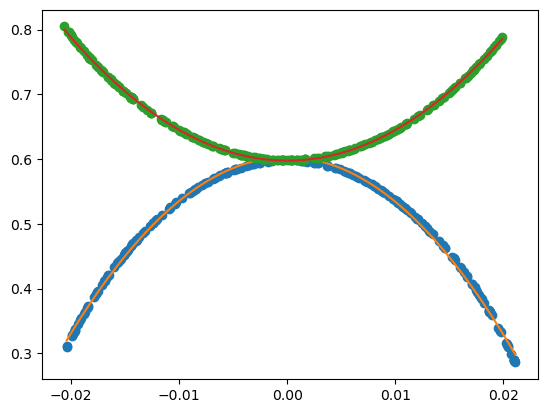

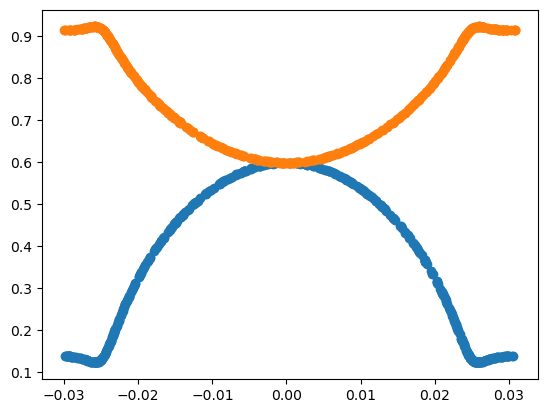

In [14]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/Vx_far.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Paul_trap_test_elecfield.mph'][i]))

data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/Vy_far.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Paul_trap_test_elecfield.mph'][i]))
    
    
pos_x = (np.array(pos_x) - pos_x[-1]/2)/1000
pos_y = (np.array(pos_y) - pos_y[-1]/2)/1000

lbx = 130
ubx = -130

lby = 130
uby = -125


plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')

d = 25*10**(-3)
d2 = 60*10**(-3)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.36, 0.0045, 0.00001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.00001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)

lbx = 10
ubx = -10

lby = 10
uby = -5


plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')

### Trapping volume

We can approximate calculate the trapping volume by looking at the turn over of the potential. Micromotion of the ions will make it slightly smaller but we can work that bit out later.

Centre piece is 1 inch long and has radial potential of ~4 mm.

End pieces are 2 inches long and have radial potential of ~25 mm.

Connecting pieces are 1 inch long and have an average radial potential of ~14.5mm.

In [5]:
Vtrap = (4e-3)**2*np.pi*25.4e-3+(25e-3)**2*np.pi*50.8e-3*2+((25e-3+4e-3)/2)**2*np.pi*25.4e-3*2
Vchamber = 0.001263 # Just centre osctogonal section - taken from the website

In [6]:
Vtrap/Vchamber

0.1855283336599899

In [15]:
(4e-3)**2*np.pi*125e-3/Vchamber

0.004974810219461272

In [2]:
0.02*0.05*10000

10.0

So this Paul trap takes up about 20 % of the chamber :D. But we will see if I can actually fit it in + how micromotion affects this. But regardless this is pretty good.

Maybe should also consider DC and RF separately to figure out params then reconsider together to get exact volume.

## DC only

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

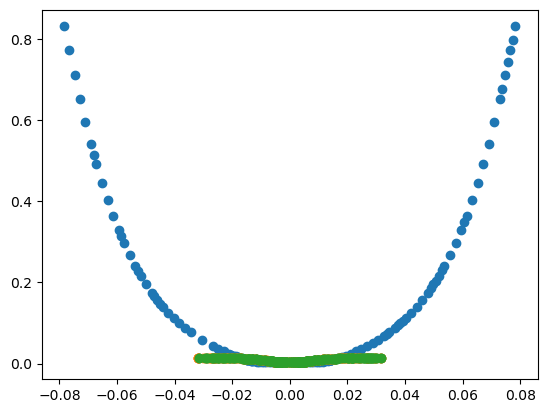

In [13]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/DC on/data1.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Paul_trap_test_elecfield.mph'][i]))

data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/DC on/data2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Paul_trap_test_elecfield.mph'][i]))
    
data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/DC on/data3.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Paul_trap_test_elecfield.mph'][i]))
    
pos_x = (np.array(pos_x) - pos_x[-1]/2)/1000
pos_y = (np.array(pos_y) - pos_y[-1]/2)/1000
pos_z = (np.array(pos_z) - pos_z[-1]/2)/1000 

lbx = 0
ubx = -1

lby = 0
uby = -1

lbz = 0
ubz = -1

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

d = np.sqrt((3.5*10**(-3))**2+(1.21*10**(-3))**2)-1*10**(-3)
d2 = 60*10**(-3)

fitquart, covquad = opt.curve_fit(lambda x, eff1, eff2, V0, d0: quartic(x, eff1, eff2, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.01, 0.01, 0.0045, 0.00001])
print(fitquad)
fittedx = quartic(pos_x[lbx:ubx], fitquart[0], d, fitquart[1], fitquart[2], fitquart[3])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.00001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d2, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.086, 0.0045, 0.00001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d2, fitquad3[1], fitquad3[2])

plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.figure()
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

lbx = 100
ubx = -100

lby = 100
uby = -95


plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')

[ 2.72730890e-01  6.77562486e-04  2.33056612e-03 -2.07995184e-05]


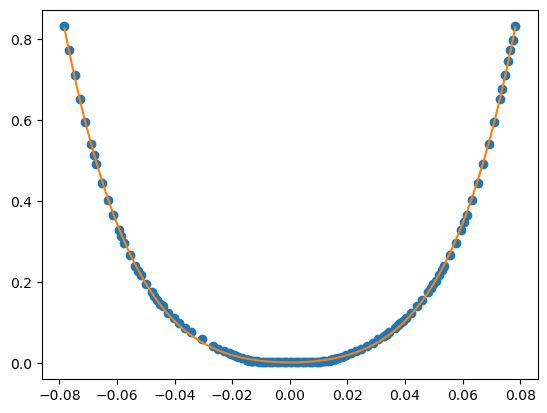

In [32]:
lbx = 0
ubx = -1

fitquart, covquad = opt.curve_fit(lambda x, eff1, eff2, V0, d0: quartic(x, eff1, eff2, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.01, 0.01, 0.0045, 0.00001])
print(fitquart)
fittedx = quartic(pos_x[lbx:ubx], fitquart[0], fitquart[1], d, fitquart[2], fitquart[3])


plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)

## AC only

0.00270325532471095
[-1.24002168e-01  4.94852524e-01 -9.06535628e-06]
[1.31509905e-01 5.03160517e-01 7.45331534e-06]
[-6.44154284e-05  5.00074927e-01 -6.95258378e-03]


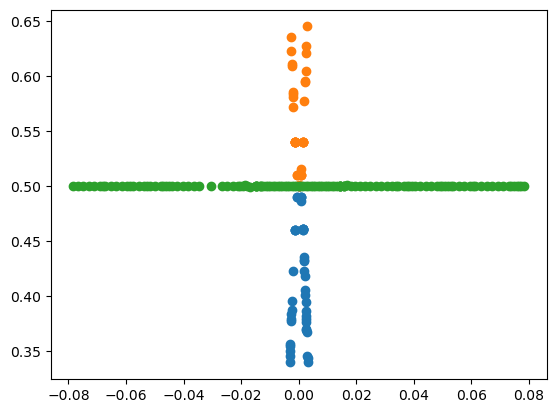

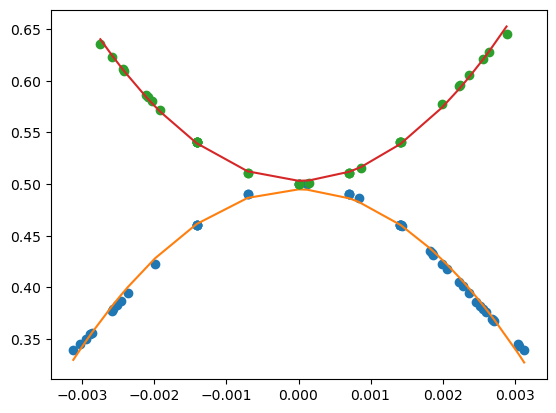

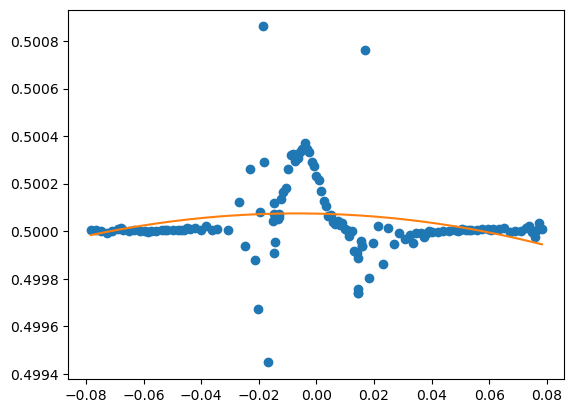

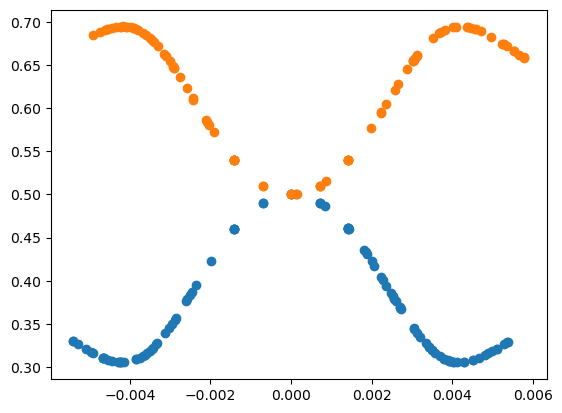

In [14]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/RF on/data2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Paul_trap_test_elecfield.mph'][i]))

data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/RF on/data3.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Paul_trap_test_elecfield.mph'][i]))
    
data = pd.read_csv('C:/Users/Tom/Documents/Yale/data/Hybrid Trap/RF on/data1.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Paul_trap_test_elecfield.mph'][i]))
    
pos_x = (np.array(pos_x) - pos_x[-1]/2)/1000
pos_y = (np.array(pos_y) - pos_y[-1]/2)/1000
pos_z = (np.array(pos_z) - pos_z[-1]/2)/1000 

lbx = 130
ubx = -130

lby = 130
uby = -125

lbz = 0
ubz = -1

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

d = np.sqrt((3.5*10**(-3))**2+(1.21*10**(-3))**2)-1*10**(-3)
d2 = 60*10**(-3)
print(d)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.36, 0.0045, 0.00001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.00001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d2, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.086, 0.0045, 0.00001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d2, fitquad3[1], fitquad3[2])

plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.figure()
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

lbx = 100
ubx = -100

lby = 100
uby = -95


plt.figure()
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')

In [25]:
V0 = 50
wrf = 2*np.pi*1*10**6
q = -1.6*10**(-19)
m = 100*(1.66*10**(-27))
qm = q/m
qx = 2*4*qm*V0*fitquad[0]/d**2/wrf**2
print(qx)
ws = qx/2*wrf
print(ws/2/np.pi)
kb = 1.38*10**(-23)
T = 293
print(np.sqrt(kb*T/m/ws**2))

0.16571708867393994
82858.54433696996
0.0002997796454862096


### End

[-8.62460248e-02  1.11537394e-02 -3.86734070e-07]
[-8.38915956e-02  1.11559554e-02 -4.00300819e-07]
[ 8.87518525e-02  1.11009249e-02 -1.04671970e-06]
0.9717659105660423
0.05476231576871726
0.5132641131673799


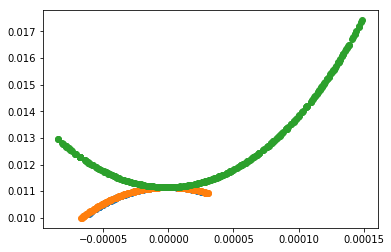

In [19]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Equal_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Equal_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Equal_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 220
ubx = 400

lby = 220
uby = 400

lbz = 1300
ubz = -1300

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

d = 5.7*10**(-4)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [-0.86, 0.0045, 0.001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.86, 0.0045, 0.001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.86, 0.0045, 0.001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d, fitquad3[1], fitquad3[2])

#plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
#plt.plot(pos_x[lbx:ubx], fittedx)
#plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
#plt.plot(pos_y[lby:uby], fittedy)
#plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
#plt.plot(pos_z[lbz:ubz], fittedz)

Dx = fitquad[0]
Dy = fitquad2[0]
Dz = fitquad3[0]
print(-Dx/Dz)
print(1 + Dy/Dz)
print((-Dx/Dz + 1 + Dy/Dz)/2)

### Offset

### 5 blade

In [20]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_x2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_y2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 0
ubx = -1

lby = 250
uby = -250

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
#plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

plt.plot(pos_x[lbx:ubx], fittedlin[lbx:ubx])
plt.plot(pos_y[lby:uby], fittedlin2[lby:uby])

plt.figure()

lbx = 250
ubx = -250
Ex = -np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = -np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('DC from V')
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

FileNotFoundError: File b'D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_x2.csv' does not exist

[ 9.28195643e+06 -1.23710642e+03]
[-9.99560461e+06 -1.29179613e+03]

DC from E
3.9179066737240296e-42
4.271967370736708e-42

AC from E
1.116565108786819e-41
1.2948609646286792e-41
[-9.36630900e+06  1.24381728e+03]
[ 1.00234630e+07 -1.20238234e+03]

DC from E
3.9605284388733e-42
3.701051644915533e-42

AC from E
1.1369515648122393e-41
1.302088740662489e-41


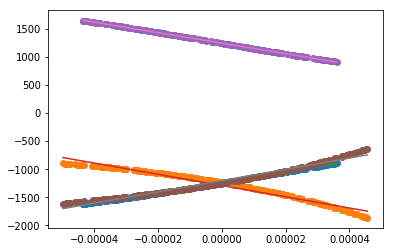

In [21]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_Ex.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_Ey.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-6)*10*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-6)*10*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_Ex2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-6)*10*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-6)*10*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

In [2]:
print(1/9.28195643e+06)
print(1/1.23710642e+03)

1.0773590756878827e-07
0.0008083378954576923


# 3 Blade mid

[-8.22807169e-02 -1.04434799e+03  1.86334737e+05  2.97393973e-04]
[-4.22559655e-02 -1.16116877e+03  1.60353020e+05  2.38859320e-04]
[-90580.03882333  -1221.65101949]
[340849.24277932  -1243.3595483 ]
DC from V
2.7920965845578993e-42
3.4516810564529806e-42

AC from V
4.4997942155922466e-45
3.332416598161521e-45

DC from E
3.8206239063354436e-42
3.957613993854353e-42

AC from E
1.0633347489473778e-45
1.5056695536899668e-44


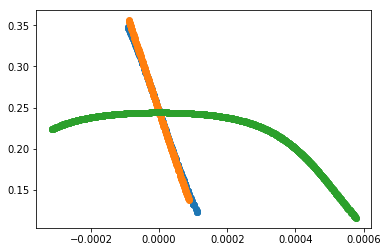

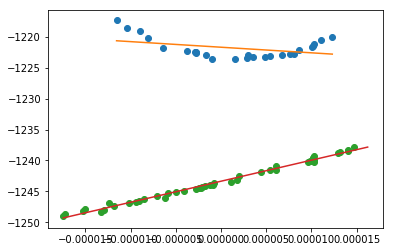

In [183]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 mid blade\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 mid blade\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 mid blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

plt.figure()

lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('DC from V')
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

In [5]:
print(1/340849.24277932)
print(1/1221.65101949)

2.933848383660461e-06
0.0008185643723503524


[-9.28272746e+06  1.22482120e+03]
[ 9.67926682e+06 -1.20044471e+03]

DC from E
3.840478631786193e-42
3.689132778732089e-42

AC from E
1.0050755546355415e-42
7.770874580159934e-42


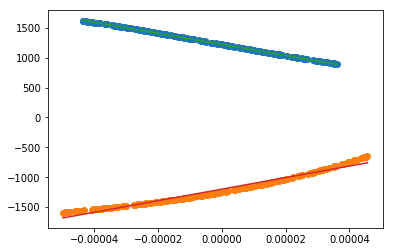

In [22]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 mid blade\\Offset_Ex2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 mid blade\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-6)*3*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-6)*8*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

# 2 Blade alternate

[ 3.20634224e-02 -3.16092910e+02 -6.87285837e+04  1.54246099e-04]
[ 6.13940442e-02 -3.85219228e+02 -1.67335410e+06  6.30612798e-05]
[-3.66394402e+05 -3.02891236e+02]
[-3.38330354e+06 -1.94080258e+02]
DC from V
2.557817026909141e-43
3.798882659784848e-43

AC from V
6.121809208143482e-46
3.628947689592244e-43

DC from E
2.3486233880845807e-43
9.642789540474188e-44

AC from E
1.7398133574885893e-44
1.4834978763691004e-42


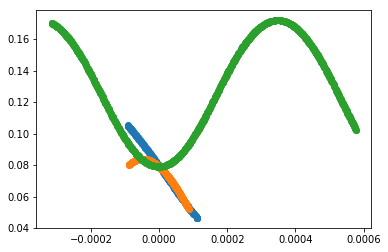

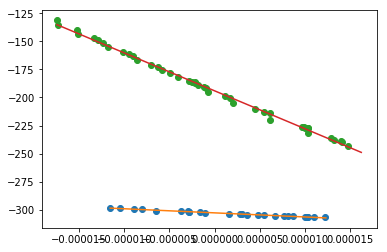

In [37]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 alternate blade\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 alternate blade\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 alternate blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

plt.figure()

lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('DC from V') 
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

[ 5.67641161e+06 -1.00820698e+03]
[ 4.34704455e+06 -1.94166209e+02]

DC from E
2.6021921783881603e-42
9.651332233227986e-44

AC from E
4.1759256814770647e-44
2.4490247989049353e-42


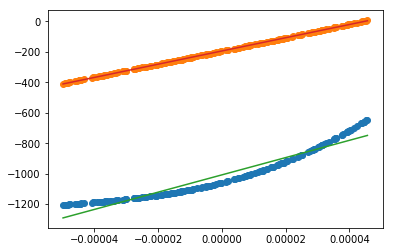

In [23]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 alternate blade\\Offset_ACEy2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\3 alternate blade\\Offset_DCEy2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-6)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

# end

[ 6.42028379e-03 -1.31774058e+01  5.01187065e+04 -1.31096520e-04]
[ 5.46271728e-03  7.56090217e+00 -1.56990789e+05 -2.40879588e-05]
[ 4.18175689e-03 -2.58689284e+01  1.01545145e+05  4.60470572e-05]
[ 8.69224690e+04 -7.45845967e-03]
[-3.28869063e+05 -1.18981637e-01]
[ 2.47476758e+05 -3.41193506e+01]
DC from V
4.445286986454291e-46
1.4634813857326185e-46
1.7131557280173216e-45

AC from V
3.2554026282842963e-46
3.1941355671216456e-45
1.3363595701096897e-45

DC from E
1.4240926880748148e-52
3.6240972669026418e-50
2.9801730252181286e-45

AC from E
9.791948237831477e-46
1.4016869967547383e-44
7.937319019488368e-45


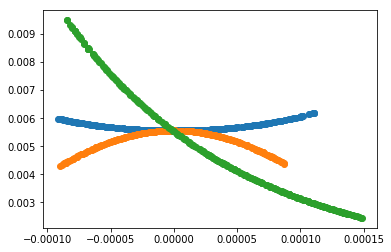

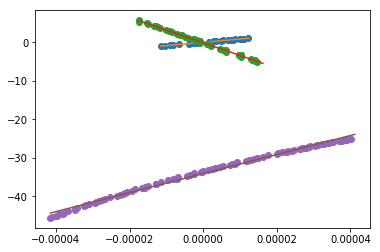

In [46]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1300
ubz = -1300

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

fitlin3, covlin3 = opt.curve_fit(lin, pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin3)
fittedlin3 = lin(np.array(pos_z), fitlin3[0], fitlin3[1], fitlin3[2], fitlin3[3])

plt.figure()

lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

lbz = 1350
ubz = -1450
Ez = np.diff(pot_z)/np.diff(pos_z)
fitz, covz = opt.curve_fit(linear, pos_z[:-1][lbz:ubz], Ez[lbz:ubz], p0 = [1/10**(-6), 1/0.007])
print(fitz)
fittedz = linear(np.array(pos_z), fitz[0], fitz[1])
plt.plot(pos_z[:-1][lbz:ubz], Ez[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])

print('DC from V')
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin3[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin3[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitz[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitz[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

[-7.88038177e+04  9.35536674e-02]
[ 3.28871182e+05 -1.28105351e-02]
[-2.55292441e+05 -3.47484493e+01]

DC from E
2.2405859012751203e-50
4.201211132000758e-52
3.0910841079641514e-45

AC from E
8.048214027697837e-46
1.4017050531366804e-44
8.446580233910266e-45


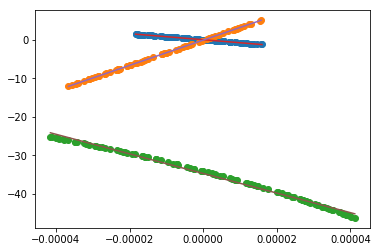

In [24]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_Ex2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_Ez2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
Ez= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    Ez.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250
lbz = 1350
ubz = -1450

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], Ez[lbz:ubz], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

fitz, covz = opt.curve_fit(linear, pos_z[lbz:ubz], Ez[lbz:ubz], p0 = [1/10**(-6), 1/0.007])
print(fitz)
fittedz = linear(np.array(pos_z), fitz[0], fitz[1])
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitz[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitz[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

# Bigger

### Equal

### 5 Blade

[-7.00130258e-01  4.95910424e-01  2.07493719e-08]
[ 7.04153763e-01  4.95910199e-01 -1.93236613e-08]
[1.30519316e-03 4.95908461e-01 2.63424384e-05]


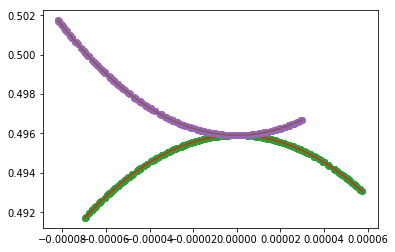

In [27]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Equal_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Equal_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Equal_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 220
ubx = 450

lby = 220
uby = 450

lbz = 1400
ubz = -1400

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
#plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

d = 2*10**(-4) + 7*10**(-4)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.86, 0.0045, 0.001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.86, 0.0045, 0.001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.86, 0.0045, 0.00001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d, fitquad3[1], fitquad3[2])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
#plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
#plt.plot(pos_z[lbz:ubz], fittedz)

In [73]:
0.0088 + 0.0054

0.0142

### 3 blade

[-4.54886651e-01  3.31972554e-01  3.86302042e-08]
[ 7.48862464e-01  3.31970308e-01 -8.09151922e-09]
[-1.39206066e-01  3.31975484e-01 -5.37886410e-06]


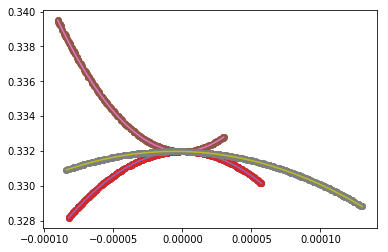

In [39]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 mid blade\\Equal_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 mid blade\\Equal_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 mid blade\\Equal_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 200
ubx = 450

lby = 200
uby = 450

lbz = 1300
ubz = -1300

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

d = 2*10**(-4) + 7*10**(-4)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.086, 0.0045, 0.001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.086, 0.0045, 0.00001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d, fitquad3[1], fitquad3[2])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

In [5]:
import numpy as np

np.sqrt(0.175**2+0.1**2)

0.20155644370746373

In [16]:
print(0.9*np.sin(60/180*np.pi)*2)
print(0.9*np.cos(60/180*np.pi)*2)

1.5588457268119895
0.9000000000000002


### end

[-4.71697989e-01  1.63915880e-01 -1.92361433e-08]
[-8.50711936e-02  1.63917458e-01  3.43101231e-07]
[ 2.80376744e-01  1.63912710e-01 -5.04981854e-06]
1.6823720226149492
0.6965825608601505
1.1894772917375498


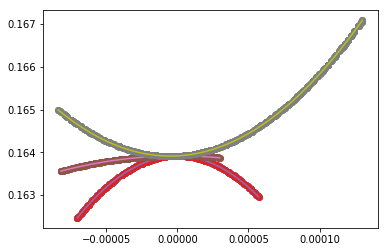

In [31]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Equal_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Equal_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Equal_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 220
ubx = 450

lby = 220
uby = 450

lbz = 1300
ubz = -1300

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

d = 5.7*10**(-4) + 7*10**(-4)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.086, 0.0045, 0.001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.2, 0.045, 0.00001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.086, 0.0045, 0.00001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d, fitquad3[1], fitquad3[2])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

Dx = fitquad[0]
Dy = fitquad2[0]
Dz = fitquad3[0]
print(-Dx/Dz)
print(1 + Dy/Dz)
print((-Dx/Dz + 1 + Dy/Dz)/2)

### Offset

### 5 Blade

[ 1.17868457e-01 -2.62518254e+02 -4.05033462e+03  4.99479940e-04]
[ 3.26226662e-01  2.62628177e+02 -6.06632065e+02  2.97697662e-04]
[-6627.04451552  -258.52563704]
[-383.19526001  263.53977164]
DC from V
1.7642453383924222e-43
1.7657231241234616e-43

AC from V
2.1261152844121904e-48
4.769311910570295e-50

DC from E
1.7109889282324289e-43
1.7780022075929594e-43

AC from E
5.691736383791685e-48
1.9030283505639355e-50


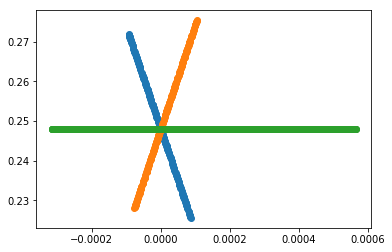

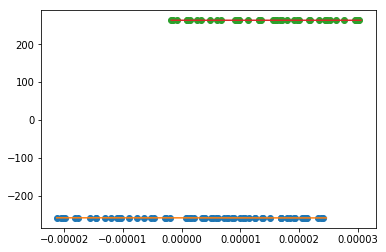

In [49]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

plt.figure()

lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('DC from V')
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

[ 4.43088538e+05 -2.57860415e+02]
[ 9.77575764e+06 -1.24342130e+03]

DC from E
1.702195034378212e-43
3.958007134955227e-42

AC from E
3.57806782175449e-45
1.7416800959381258e-42


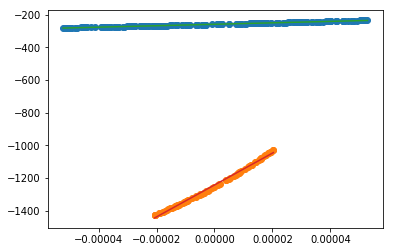

In [17]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_Ex2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 300
uby = -300

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-6)*10*fitx[0]*500*1.6*10**(-19))**2*(75*10**(-9))**2)
print((2.25*10**(-6)*10*fity[0]*500*1.6*10**(-19))**2*(75*10**(-9))**2)

In [50]:
### 3 Blade

[ 1.11548578e-01 -1.70084881e+02  6.24864746e+04  2.89328090e-04]
[123481.97885592   -206.02482831]
[43086.35815518   201.04132467]
[-1.73405514e+05 -1.00747395e+00]
DC from V
7.405789898444181e-44

AC from V
5.060309129503512e-46

DC from E
1.0866234848812811e-43
1.0346909241980216e-43
2.59840962013629e-48

AC from E
1.976114763641696e-45
2.4059387997628405e-46
3.897003618701219e-45


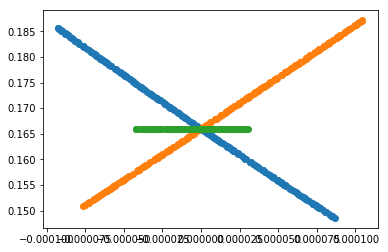

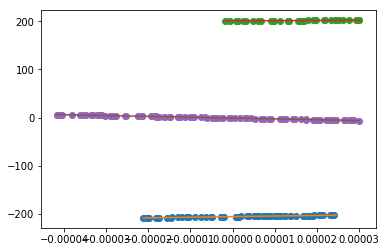

In [29]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 Blade\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 Blade\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 Blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1800
ubz = 1900

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

#fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby] )
#print(fitlin2)
#fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

plt.figure()

lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

lby = 250
uby = -250
Ez = np.diff(pot_z)/np.diff(pos_z)
fitz, covz = opt.curve_fit(linear, pos_z[:-1][lbz:ubz], Ez[lbz:ubz])
print(fitz)
fittedz = linear(np.array(pos_z), fitz[0], fitz[1])
plt.plot(pos_z[:-1][lbz:ubz], Ez[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])


print('DC from V')
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
#print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
#print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitz[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitz[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

In [28]:
print(1/fitx)
print(1/fity)
print(1/fitz)

[ 8.09834770e-06 -4.85378393e-03]
[2.32092022e-05 4.97410173e-03]
[-5.76682930e-06 -9.92581497e-01]


In [14]:
import numpy as np

750/np.cos(45/180*np.pi)

1060.6601717798212

In [10]:
print(np.sqrt(570**2-200**2))

533.7602458033007


In [13]:
np.sqrt(1270**2-534**2)

1152.277744296053

[-5.16725433e+05 -2.13101459e+02]
[ 3.39224083e+05 -1.96021564e+02]

DC from E
1.1625531323885098e-43
9.83666011667407e-44

AC from E
3.114348340663707e-45
9.544613113751022e-45


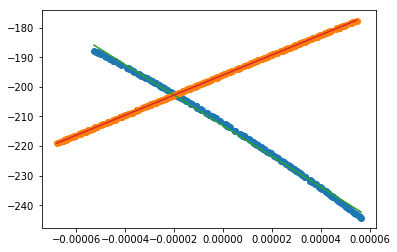

In [42]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 mid blade\\Offset_Ex2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 mid blade\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\3 mid blade\\Offset_Ez2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
Ez= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    Ez.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-6)*3*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-6)*8*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

### End

[ 8.13210482e-02  1.97252263e+00 -6.65830729e+04 -1.47910520e-05]
[ 8.13349209e-02  2.11083573e-01 -2.06359058e+04 -4.46570554e-06]
[-1.32258667e+05 -4.73592944e-02]
[-4.12163596e+04  5.85585641e-03]
[ 1.73308051e+05 -1.25746539e+02]
DC from V
9.960564594038626e-48
1.1406406374779408e-49

AC from V
5.7455640582170516e-46
5.518894270101205e-47

DC from E
5.741831086306497e-51
8.778509909184697e-53
4.0479211645796234e-44

AC from E
2.2670092113387336e-45
2.2016296314856574e-46
3.892624196650906e-45


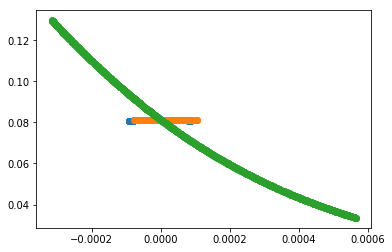

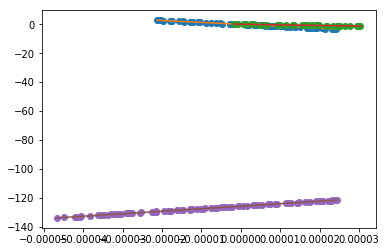

In [32]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))
    
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

plt.figure()

lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

lbz = 1350
ubz = -1450
Ez = np.diff(pot_z)/np.diff(pos_z)
fitz, covz = opt.curve_fit(linear, pos_z[:-1][lbz:ubz], Ez[lbz:ubz], p0 = [1/10**(-6), 1/0.007])
print(fitz)
fittedz = linear(np.array(pos_z), fitz[0], fitz[1])
plt.plot(pos_z[:-1][lbz:ubz], Ez[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])

print('DC from V')
print((fitlin[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
#print((fitlin3[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from V')
print((2.25*10**(-5)*fitlin[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitlin2[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
#print((2.25*10**(-5)*fitlin3[2]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitz[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitz[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

In [8]:
4*(126*50*1.6*10**(-19))**2*(14.1*10**(-9))**2

8.080147353600002e-46

In [35]:
3.2*10**(-45)/250

1.28e-47

In [31]:
print(2*(fitx[1]*50*1.6*10**(-19))**2*(14.1*10**(-9))**2)
print(2*(fity[1]*50*1.6*10**(-19))**2*(14.1*10**(-9))**2)
print(2*(fitz[1]*50*1.6*10**(-19))**2*(14.1*10**(-9))**2)

1.0801580751462374e-45
1.0285345131990433e-45
2.582949082896478e-50


In [33]:
print(4*(fitx[1]*50*1.6*10**(-19))**2*(14.1*10**(-9))**2)
print(4*(fity[1]*50*1.6*10**(-19))**2*(14.1*10**(-9))**2)
print(4*(fitz[1]*50*1.6*10**(-19))**2*(14.1*10**(-9))**2)

1.1415334382685945e-52
1.7452555550450098e-54
8.04767206730075e-46


In [16]:
print(1/fitx)
print(1/fity)
print(1/fitz)

[-7.56094116e-06 -2.11151794e+01]
[-2.42622107e-05  1.70769215e+02]
[ 5.77007239e-06 -7.95250516e-03]


[ 9.91927492e+04 -5.62097775e-03]
[ 1.46507545e+05 -2.54756068e-02]
[-1.73481870e+05  1.25809589e+02]

DC from E
8.088420072441085e-53
1.661456743303044e-51
4.051981470029694e-44

AC from E
1.2751605143572401e-45
2.7817940932022012e-45
3.9004363001819e-45


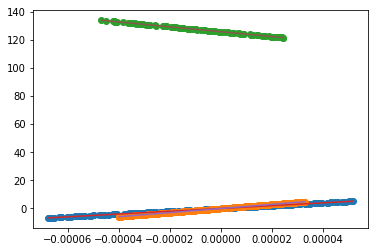

In [35]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_Ex2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
Ex = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    Ex.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_Ey2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
Ey= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    Ey.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_Ez2.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
Ez= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    Ez.append(float(data['Trap.mph'][i]))
    
lbx = 250
ubx = -250
lby = 250
uby = -250
lbz = 1350
ubz = -1450

plt.plot(pos_x[lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], Ez[lbz:ubz], 'o')

fitx, covx = opt.curve_fit(linear, pos_x[lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

fity, covy = opt.curve_fit(linear, pos_y[lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

fitz, covz = opt.curve_fit(linear, pos_z[lbz:ubz], Ez[lbz:ubz], p0 = [1/10**(-6), 1/0.007])
print(fitz)
fittedz = linear(np.array(pos_z), fitz[0], fitz[1])
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])

print('\nDC from E')
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitz[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

print('\nAC from E')
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fitz[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

In [120]:
print('Mid blade far')
wd = 2*np.pi*3000
U0 = 1
V0 = 100
qm = 1.3
qx = qm*2*0.116/(900*10**(-6))**2/wd**2*V0
qy = qx
ax = -0.76*qm*0.28*4*U0/(1270*10**(-6))**2/wd**2
ay = -(1-0.76)*qm*0.28*4*U0/(1270*10**(-6))**2/wd**2
bx = np.sqrt(ax + qx**2/2)
by = np.sqrt(ay + qy**2/2)
bz = np.sqrt(ax/-0.76)
print(qx)
print(ax)
print(wd/2*bx)
print(qy)
print(ay)
print(wd/2*by)
print(wd/2*bz)

Mid blade far
0.1047958470045579
-0.0019309244385762247
562.3489727011502
0.1047958470045579
-0.0006097656121819657
658.4756653101983
475.05836626766484


In [117]:
print('Mid blade near')
wd = 2*np.pi*50000
U0 = 1
V0 = 100
qm = 1.3
qx = qm*2*0.346/(200*10**(-6))**2/wd**2*V0
qy = qx
ax = 0.27*qm*0.089*4*U0/(570*10**(-6))**2/wd**2
ay = -(1+0.27)*qm*0.089*4*U0/(570*10**(-6))**2/wd**2
bx = np.sqrt(ax + qx**2/2)
by = np.sqrt(ay + qy**2/2)
bz = np.sqrt(ax/0.27)
print(qx)
print(ax)
print(wd/2*bx)
print(qy)
print(ay)
print(wd/2*by)
print(wd/2*bz)

Mid blade near
0.022787134201161772
3.8967958827983885e-06
2549.9377809643
0.022787134201161772
-1.832937322649612e-05
2440.0356443376018
596.7491702349105


In [243]:
print('Five blade far')
wd = 2*np.pi*3000
U0 = 0
V0 = 200
qm = 1.3/5
qx = qm*2*0.00284/(900*10**(-6))**2/wd**2*V0
qy = qx
ax = -0.76*qm*0.28*4*U0/(1270*10**(-6))**2/wd**2
ay = -(1-0.76)*qm*0.28*4*U0/(1270*10**(-6))**2/wd**2
bx = np.sqrt(ax + qx**2/2)
by = np.sqrt(ay + qy**2/2)
bz = np.sqrt(ax/-0.76)
print(qx)
print(ax)
print(wd/2*bx)
print(qy)
print(ay)
print(wd/2*by)
print(wd/2*bz)

Five blade far
0.0010262765706653256
-0.0
6.83943999846098
0.0010262765706653256
-0.0
6.83943999846098
0.0


In [262]:
print('Five blade near')
wd = 2*np.pi*3000
U0 = 5
V0 = 200
qm = 1.3/5
qx = qm*2*0.35/(900*10**(-6))**2/wd**2*V0
qy = qx
ax = -0.5*qm*0.28*4*U0/(1270*10**(-6))**2/wd**2
ay = -(1-0.5)*qm*0.28*4*U0/(1270*10**(-6))**2/wd**2
bx = np.sqrt(ax + qx**2/2)
by = np.sqrt(ay + qy**2/2)
bz = np.sqrt(ax/-0.5)
print(qx)
print(ax)
print(wd/2*bx)
print(qy)
print(ay)
print(wd/2*by)
print(wd/2*bz)

Five blade near
0.1264777463848112
-0.001270345025379095
773.0596284874742
0.1264777463848112
-0.001270345025379095
773.0596284874742
475.05836626766484


In [263]:
U0 = 50
np.sqrt(qm*0.086*4*U0/(3500*10**(-6))**2/wd**2)*wd/2

302.1014831516869

# Offset xy - orig

In [233]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\5 blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))

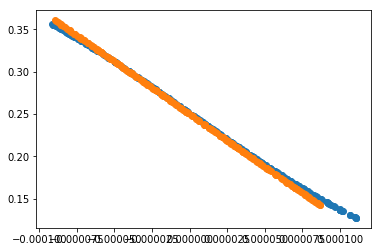

In [234]:
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
#plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

In [235]:
fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

[-5.49556089e-02 -1.04655455e+03  2.33652949e+05  2.74874336e-04]
[-7.41013357e-02 -1.23701442e+03  3.09477662e+03  2.61677435e-04]


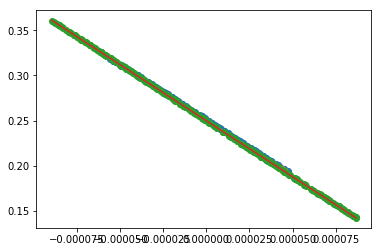

In [248]:
lb = 250
ub = 320
#plt.plot(pos_yoff[lb:ub], pot_yoff[lb:ub])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedlin[lbx:ubx])

plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedlin2[lby:uby])

In [247]:
print(1/fitlin[1])
print(2/fitlin[2])

print(1/fitlin2[1])
print(2/fitlin2[2])

-0.0009555163647348903
8.559703653444736e-06
-0.0008083980108441951
0.000646250196324087


In [238]:
1/2/219

0.00228310502283105

In [239]:
print((fitlin[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)

2.271165201244399e-42
3.173032436802076e-42


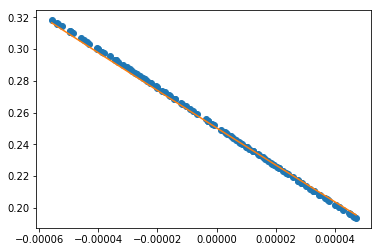

In [252]:
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedlin[lbx:ubx])

In [261]:
np.mean(np.diff(pos_x)[lbx:ubx])

8.626720026307134e-07

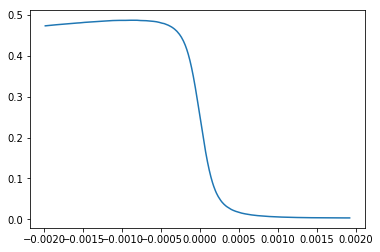

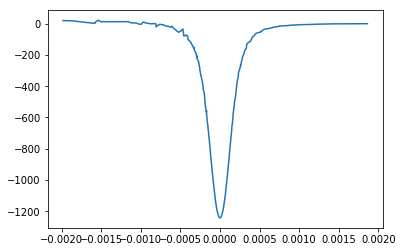

In [267]:
lbx = 0
ubx = -1
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx])
plt.figure()
plt.plot(pos_x[:-2], np.diff(pot_x)[lbx:ubx]/np.diff(pos_x)[lbx:ubx])

[-4399.98762246 -1240.77201944]


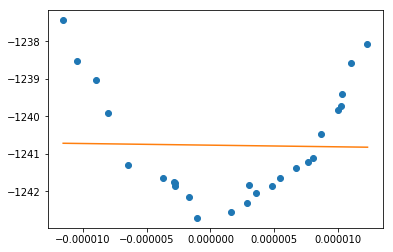

In [277]:
lbx = 250
ubx = -250
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], Ex[lbx:ubx])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

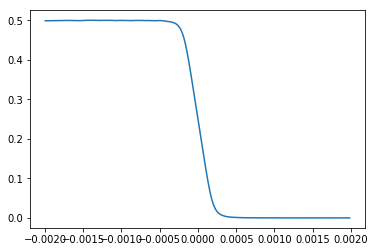

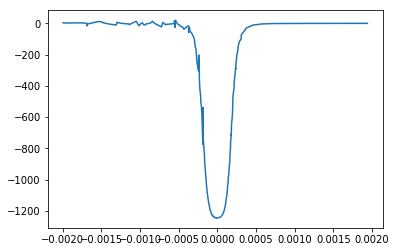

In [285]:
lby = 0
uby = -1
plt.plot(pos_y[lby:uby], pot_y[lby:uby])
plt.figure()
plt.plot(pos_y[lby:uby-1], np.diff(pot_y)[lby:uby]/np.diff(pos_y)[lby:uby])

[11639.2257373  -1244.45485983]


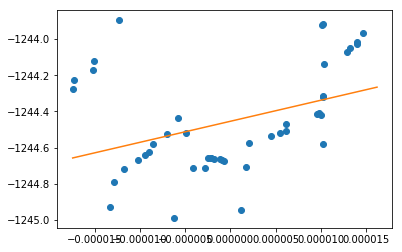

In [279]:
lby = 250
uby = -250
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], Ey[lby:uby], p0 = [1/10**(-6), 1/0.007])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

In [280]:
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

3.941158922801569e-42
3.9645898192910715e-42


In [281]:
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

2.509041883681313e-48
1.7557116219000925e-47


In [214]:
kb = 1.38*10**(-23)
M = 4/3*np.pi*(193.5*10**(-9))**3*1850
T = 293

np.sqrt(kb*T/M/(2*np.pi*600)**2)

2.251078353279877e-06

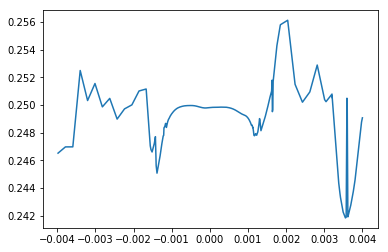

In [282]:
plt.plot(pos_z, pot_z)

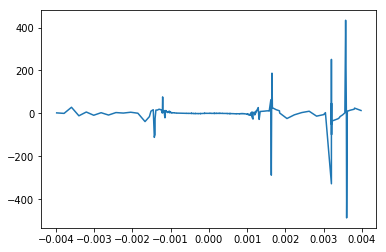

In [283]:
lbz = 1000
ubz = -1000
plt.plot(pos_z[lbz:ubz-1], np.diff(pot_z)/np.diff(pos_z))

# Offset xy - Further

In [217]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\5 blade\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))

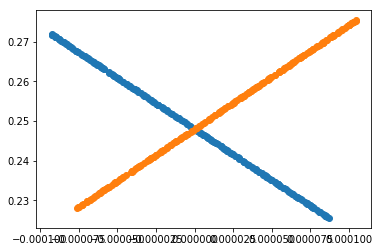

In [218]:
lbx = 150
ubx = 400

lby = 150
uby = 400

lbz = 1000
ubz = 2200

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
#plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

In [219]:
fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

[ 1.17868457e-01 -2.62518254e+02 -4.05033462e+03  4.99479940e-04]
[ 3.26226662e-01  2.62628177e+02 -6.06632065e+02  2.97697662e-04]


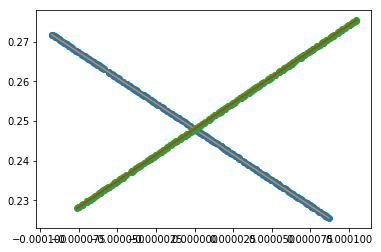

In [220]:
lb = 200
ub = -200
#plt.plot(pos_yoff[lb:ub], pot_yoff[lb:ub])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedlin[lbx:ubx])

plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedlin2[lby:uby])

In [221]:
print(1/fitlin[1])
print(2/fitlin[2])

print(1/fitlin2[1])
print(2/fitlin2[2])

-0.003809258921494431
-0.0004937863628590159
0.0038076645472911908
-0.003296891337483205


In [222]:
print((fitlin[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)

1.4290387240978624e-43
1.4302357305400038e-43


[-83939.72676067   -199.19575478]


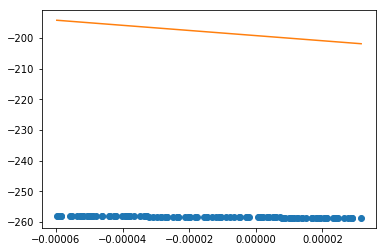

In [227]:
lbx = 200
ubx = 320
Ex = np.diff(pot_x)/np.diff(pos_x)
fitx, covx = opt.curve_fit(linear, pos_x[:-1][lbx:ubx], E[lbx:ubx], p0 = [1/10**(-6), 1/0.007])
print(fitx)
fittedx = linear(np.array(pos_x), fitx[0], fitx[1])
plt.plot(pos_x[:-1][lbx:ubx], Ex[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx[lbx:ubx])

[-85713.90393422   -197.54952282]


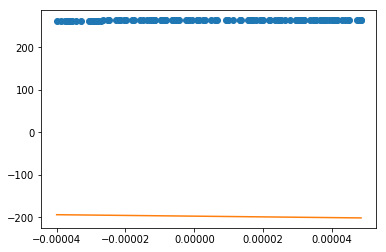

In [231]:
lby = 200
uby = 320
Ey = np.diff(pot_y)/np.diff(pos_y)
fity, covy = opt.curve_fit(linear, pos_y[:-1][lby:uby], E[lby:uby])
print(fity)
fittedy = linear(np.array(pos_y), fity[0], fity[1])
plt.plot(pos_y[:-1][lby:uby], Ey[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy[lby:uby])

In [225]:
print((fitx[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fity[1]*500*1.6*10**(-19))**2*(20*10**(-9))**2)

1.0157810873297326e-43
9.99060837557209e-44


In [226]:
print((2.25*10**(-5)*fitx[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)
print((2.25*10**(-5)*fity[0]*500*1.6*10**(-19))**2*(200*10**(-9))**2)

9.131457536338847e-46
9.521547796171903e-46


# Endcaps

In [27]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Equal_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Equal_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Equal_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))

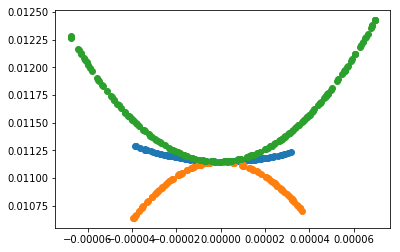

In [37]:
lbx = 220
ubx = 300

lby = 220
uby = 330

lbz = 1320
ubz = 1500

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

In [39]:
d = 570*10**(-6)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.086, 0.0045, 0.001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.086, 0.0045, 0.001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.086, 0.0045, 0.001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d, fitquad3[1], fitquad3[2])

[2.89387607e-02 1.11488283e-02 8.89464141e-07]
[-1.06998278e-01  1.11485748e-02  5.62207071e-09]
[ 8.26627112e-02  1.11461335e-02 -1.04750834e-06]


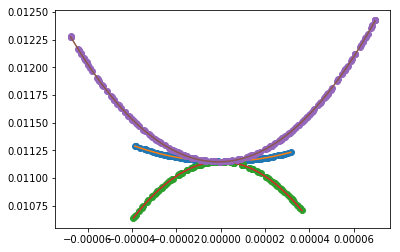

In [40]:
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

In [41]:
Dx = fitquad[0]
Dy = fitquad2[0]
Dz = fitquad3[0]
print(-Dx/Dz)
print(1 + Dy/Dz)
print((-Dx/Dz + 1 + Dy/Dz)/2)

-0.3500824045500328
-0.2943959467234154
-0.3222391756367241


# Offsets

In [84]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Original\\2 end\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))

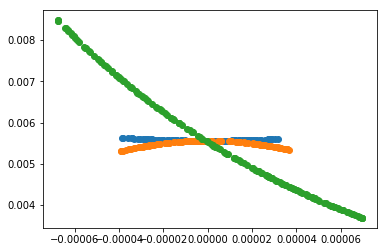

In [85]:
lbx = 220
ubx = 300

lby = 220
uby = 330

lbz = 1320
ubz = 1500

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

In [86]:
fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

fitlin3, covlin3 = opt.curve_fit(lin, pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin3)
fittedlin3 = lin(np.array(pos_z), fitlin3[0], fitlin3[1], fitlin3[2], fitlin3[3])

[ 5.56325858e-03 -6.80685850e-01  4.49324278e+04 -6.96644195e-06]
[ 5.53171849e-03 -4.35096227e+00 -1.64132463e+05  1.32540762e-05]
[ 5.37691600e-03 -3.34493840e+01  1.24120107e+05  4.48558640e-06]


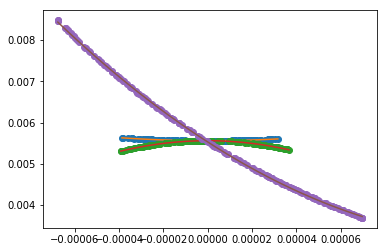

In [87]:
lb = 200
ub = -200
#plt.plot(pos_yoff[lb:ub], pot_yoff[lb:ub])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedlin[lbx:ubx])

plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedlin2[lby:uby])

plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedlin3[lbz:ubz])

In [88]:
print((fitlin[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin3[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)

9.607677791588316e-49
3.925505757340097e-47
2.3200707672865344e-45


# Further Away

In [106]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Equal_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Equal_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Equal_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))

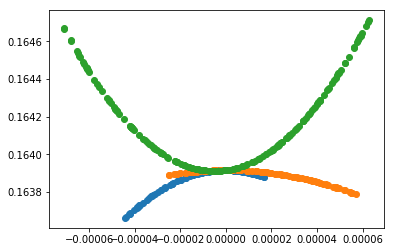

In [107]:
lbx = 220
ubx = 300

lby = 220
uby = 330

lbz = 1320
ubz = 1500

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

In [111]:
d = 570*10**(-6) + 700*10**(-6)

fitquad, covquad = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.086, 0.0045, 0.001])
print(fitquad)
fittedx = quad(pos_x[lbx:ubx], fitquad[0], d, fitquad[1], fitquad[2])

fitquad2, covquad2 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_y[lby:uby], pot_y[lby:uby], p0 = [0.86, 0.045, 0.001])
print(fitquad2)
fittedy = quad(pos_y[lby:uby], fitquad2[0], d, fitquad2[1], fitquad2[2])

fitquad3, covquad3 = opt.curve_fit(lambda x, eff, V0, d0: quad(x, eff, d, V0, d0), pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.86, 0.45, 0.001])
print(fitquad3)
fittedz = quad(pos_z[lbz:ubz], fitquad3[0], d, fitquad3[1], fitquad3[2])

[-2.11638270e-01  1.63915628e-01 -1.80038309e-07]
[-6.47360454e-02  1.63915707e-01  4.64083976e-07]
[ 2.81529043e-01  1.63911269e-01 -5.05418974e-06]


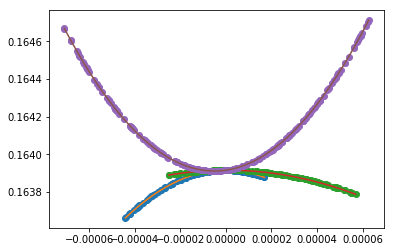

In [112]:
plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedx)
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedy)
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz)

In [113]:
Dx = fitquad[0]
Dy = fitquad2[0]
Dz = fitquad3[0]
print(-Dx/Dz)
print(1 + Dy/Dz)
print((-Dx/Dz + 1 + Dy/Dz)/2)

0.7517457792479125
0.770055534478069
0.7609006568629908


In [157]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_x.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_x = []
pot_x = []
for i in range(8, len(data['% Model'])):
    pos_x.append(float(data['% Model'][i]))
    pot_x.append(float(data['Trap.mph'][i]))
#    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_y.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_y= []
pot_y= []
for i in range(8, len(data['% Model'])):
    pos_y.append(float(data['% Model'][i]))
    pot_y.append(float(data['Trap.mph'][i]))
    
data = pd.read_csv('D:\\PhD\\Blade Trap Simulations\\Sims\\COMSOL Simulation\\Blade Trap Realistic Distance\\2 end\\Offset_z.csv') 
# Preview the first 5 lines of the loaded data 
data.head()
pos_z= []
pot_z= []
for i in range(8, len(data['% Model'])):
    pos_z.append(float(data['% Model'][i]))
    pot_z.append(float(data['Trap.mph'][i]))

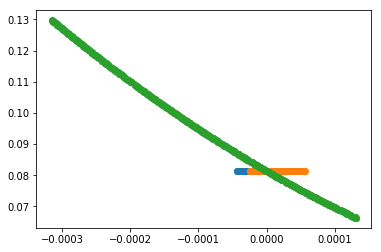

In [158]:
lbx = 220
ubx = 300

lby = 220
uby = 330

lbz = 1000
ubz = 1600

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')

In [159]:
fitlin, covlin = opt.curve_fit(lin, pos_x[lbx:ubx], pot_x[lbx:ubx], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin)
fittedlin = lin(np.array(pos_x), fitlin[0], fitlin[1], fitlin[2], fitlin[3])

fitlin2, covlin2 = opt.curve_fit(lin, pos_y[lby:uby], pot_y[lby:uby], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin2)
fittedlin2 = lin(np.array(pos_y), fitlin2[0], fitlin2[1], fitlin2[2], fitlin2[3])

fitlin3, covlin3 = opt.curve_fit(lin, pos_z[lbz:ubz], pot_z[lbz:ubz], p0 = [0.006, -4.05395521e+01, 0, 0] )
print(fitlin3)
fittedlin3 = lin(np.array(pos_z), fitlin3[0], fitlin3[1], fitlin3[2], fitlin3[3])

[ 8.13085943e-02  2.67909885e+00 -6.65006552e+04 -2.01175639e-05]
[ 8.12656054e-02 -2.40713044e+00 -2.07044436e+04  5.87455082e-05]
[ 3.71630704e-02 -2.08057038e+01  8.74057384e+04  6.01713770e-04]


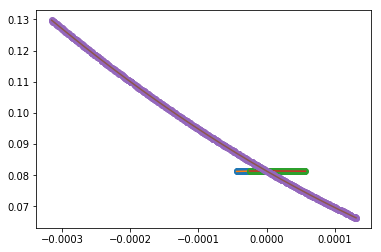

In [160]:
lb = 200
ub = -200
#plt.plot(pos_yoff[lb:ub], pot_yoff[lb:ub])

plt.plot(pos_x[lbx:ubx], pot_x[lbx:ubx], 'o')
plt.plot(pos_x[lbx:ubx], fittedlin[lbx:ubx])

plt.plot(pos_y[lby:uby], pot_y[lby:uby], 'o')
plt.plot(pos_y[lby:uby], fittedlin2[lby:uby])

plt.plot(pos_z[lbz:ubz], pot_z[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedlin3[lbz:ubz])

In [161]:
print((fitlin[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin2[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)
print((fitlin3[1]*450*1.6*10**(-19))**2*(20*10**(-9))**2)

1.4883410453977898e-47
1.2015012659177105e-47
8.9761439114995e-46


In [162]:
fitlin3

array([ 3.71630704e-02, -2.08057038e+01,  8.74057384e+04,  6.01713770e-04])

In [163]:
E = np.diff(pot_z)/np.diff(pos_z)

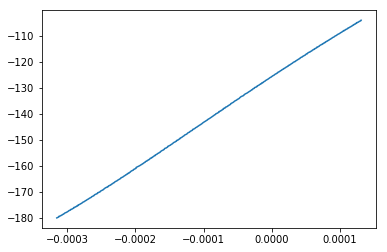

In [164]:
plt.plot(pos_z[:-1][lbz:ubz], E[lbz:ubz])

In [174]:
def linear(x, a, b):
    return x*a + b

In [175]:
E = np.diff(pot_z)/np.diff(pos_z)
fitz, covz = opt.curve_fit(linear, pos_z[:-1][lbz:ubz], E[lbz:ubz], p0 = [10**(-6), 0.007])
print(fitz)
fittedz = linear(np.array(pos_z), fitz[0], fitz[1])
plt.plot(pos_z[:-1][lbz:ubz], E[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])

[ 1.73324762e+05 -1.26089085e+02]


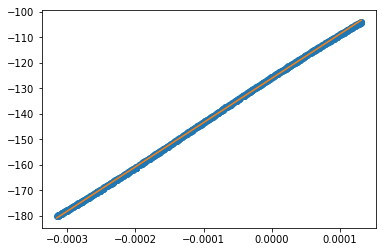

In [176]:
plt.plot(pos_z[:-1][lbz:ubz], E[lbz:ubz], 'o')
plt.plot(pos_z[lbz:ubz], fittedz[lbz:ubz])

In [177]:
print(1/fitz[0])
print(1/fitz[1])

5.76951608720275e-06
-0.007930900610402096


In [178]:
print(fitlin3)

[ 3.71630704e-02 -2.08057038e+01  8.74057384e+04  6.01713770e-04]


In [182]:
print((fitz[1]*500*1.6*10**(-19))**2*(40*10**(-9))**2)

1.6280020293887873e-43


In [208]:
print((500*1.6*10**(-19)/(2.3*10**(-3)))**2*(20*10**(-9))**2)

4.839319470699432e-43


In [4]:
import numpy as np

np.sqrt(100**2 + 175**2)

201.55644370746373

In [6]:
np.sqrt(570**2 - 200**2 + 500**2)

731.3685801290619

In [22]:
wrf = 500*2*np.pi
print(wrf/2*np.sqrt(8*10*0.3*0.13/50/wrf**2/(0.73*10**(-3))**2)/2/np.pi)

qx = 2*150*0.78*0.13/50/wrf**2/(0.5*10**(-3))**2

wrf/2*np.sqrt(-4*10*0.3*0.13/50/wrf**2/(0.73*10**(-3))**2 + qx**2/2)/2/np.pi

27.230747973810892


39.105277427146994

In [ ]:
lambda_c = 10**(--16)